<a href="https://colab.research.google.com/github/Heoyuna0819/deeplearning/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

file_path = "/content/drive/MyDrive/insurance.csv"
df = pd.read_csv(file_path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:

columns = ['sex', 'smoker', 'region']
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254
...,...,...,...,...,...,...,...
1333,32,1,276,3,0,1,746
1334,0,0,302,0,0,0,118
1335,0,0,422,0,0,2,32
1336,3,0,146,0,0,3,91


In [11]:
X=df.drop('charges',axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,1,0,197,0,1,3
1,0,1,350,1,0,2
2,10,1,331,3,0,2
3,15,1,73,0,0,1
4,14,1,223,0,0,1


In [12]:
y=df['charges']
y.head()

,charges
0,1005
1,57
2,306
3,1097
4,254


In [7]:
Y = pd.get_dummies(y).values
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070, 1337), (268, 1337))

In [13]:
from sklearn.preprocessing import StandardScaler

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 61.0260 - mse: 61.0260 - val_loss: 2.3936 - val_mse: 2.3936
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1987 - mse: 2.1987 - val_loss: 4.0201 - val_mse: 4.0201
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1882 - mse: 2.1882 - val_loss: 2.0320 - val_mse: 2.0320
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5034 - mse: 1.5034 - val_loss: 1.9278 - val_mse: 1.9278
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5374 - mse: 1.5374 - val_loss: 0.3028 - val_mse: 0.3028
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8015 - mse: 0.8015 - val_loss: 2.7001 - val_mse: 2.7001
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7135 - mse: 0.7135 - val_loss: 0.4025 - val_mse: 0.4025
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7794 - mse: 0.7794 - val_loss: 0.8090 - val_mse: 0.8090
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9281 

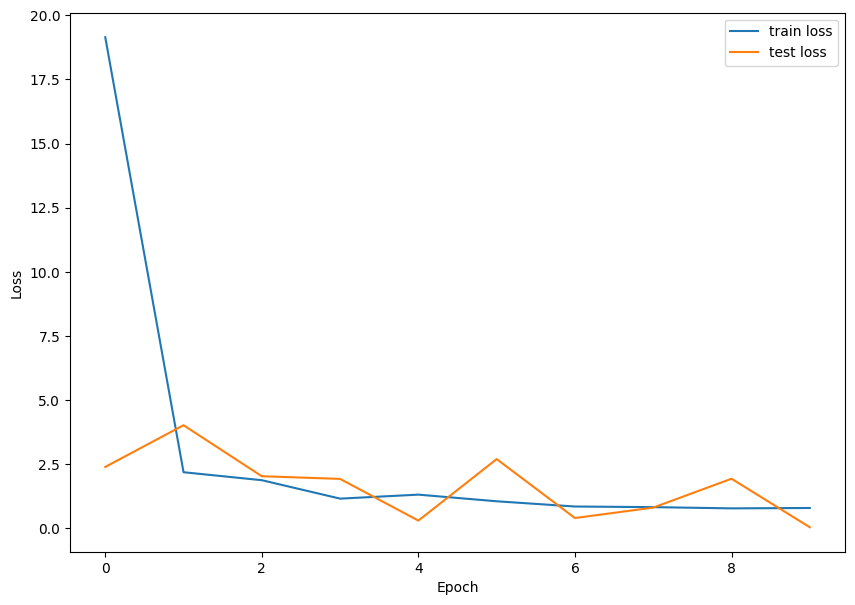

In [16]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
#성능평가
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0451 - mse: 0.0451


[0.04431189224123955, 0.04431189224123955]